In [142]:
import pandas as pd

In [143]:
df=pd.read_csv("C:/Users/wjdtj/OneDrive - dgu.ac.kr/데이터 분석/교통사고/0525/df_14_16.csv",encoding='cp949')


In [144]:
from pyproj import Proj, transform

proj_5181 = Proj(init='epsg:5181')
proj_4326 = Proj(init='epsg:4326')

def convert_5181_to_4326(x, y):
    # EPSG:5181에서 EPSG:4326으로 변환
    lon, lat = transform(proj_5181, proj_4326, x, y)
    return lon, lat


c:\Users\wjdtj\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\wjdtj\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [145]:
df['경도'],df['위도']=convert_5181_to_4326(df['위치정보X'], df['위치정보Y'])
df['경도'].head()

C:\Users\wjdtj\AppData\Local\Temp\ipykernel_28740\1219124945.py:8: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(proj_5181, proj_4326, x, y)


0    127.111410
1    127.144753
2    127.116066
3    127.146460
4    127.119690
Name: 경도, dtype: float64

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjdtj\anaconda3\L

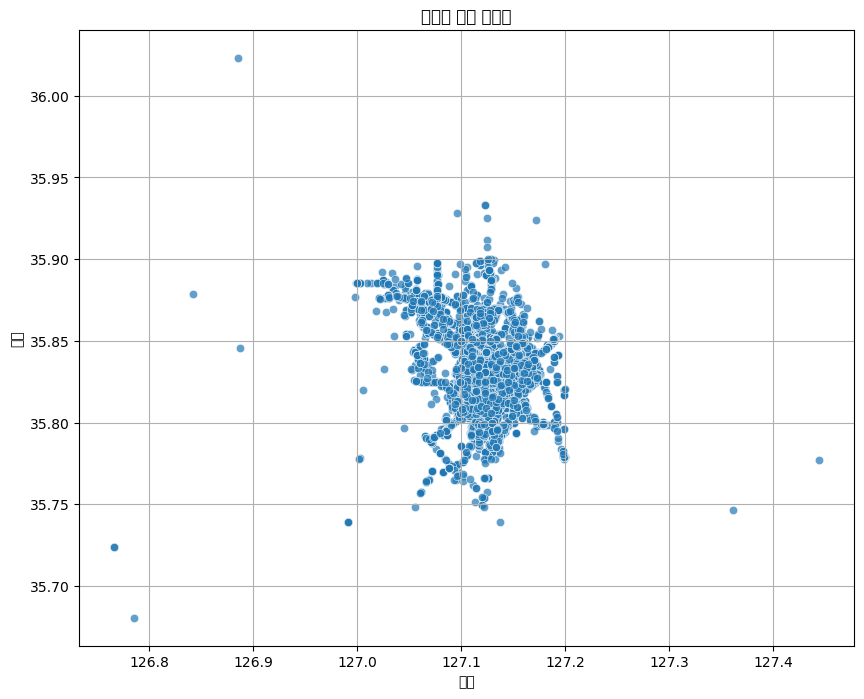

In [148]:
def plot_density(df):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x='경도', y='위도',  sizes=(20, 200), alpha=0.7)
    plt.title('점들의 밀도 시각화')
    plt.xlabel('경도')
    plt.ylabel('위도')
    plt.grid(True)
    plt.show()

# 사용 예시
plot_density(df)

In [137]:
df=df[(df['경도']>126.9)&(df['경도']<127.3)]
df=df[(df['위도']>35.72891)&(df['위도']<35.90280)]

c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjdtj\anaconda3\L

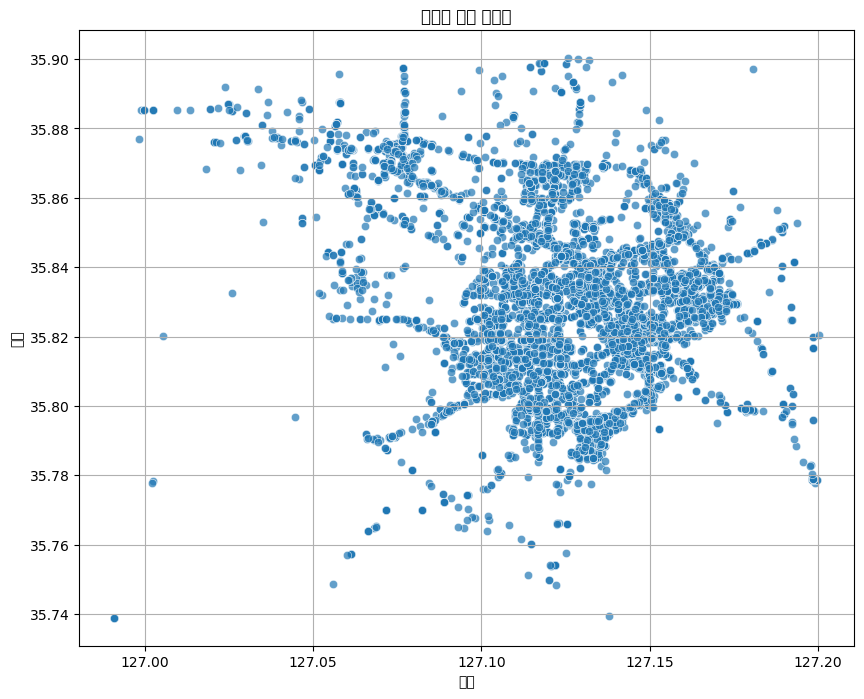

In [138]:
def plot_density(df):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x='경도', y='위도',  sizes=(20, 200), alpha=0.7)
    plt.title('점들의 밀도 시각화')
    plt.xlabel('경도')
    plt.ylabel('위도')
    plt.grid(True)
    plt.show()

# 사용 예시
plot_density(df)

In [152]:
# 1. 좌표 결측치 제거
df.dropna(subset=['위치정보X','위치정보Y'],inplace=True) 

In [153]:
# 2. 연령 이상치 제거 => 데이터에 맞춰서
df=df[(df['환자연령']<130)&(df['환자연령']>0)]


In [154]:
# 3. 수치형 변수 추출
df = df[['구급보고서번호','위치정보X','위치정보Y','신고시','계절구분명','요일','시간단위기온','시간단위강수량','시간단위풍속','시간단위풍향','시간단위습도','시간단위적설량','환자연령','환자성별구분명','교통사고명','읍면동명','위도','경도']]
df.reset_index(drop=True, inplace=True)

In [158]:
df.head()

,구급보고서번호,위치정보X,위치정보Y,신고시,계절구분명,요일,시간단위기온,시간단위강수량,시간단위풍속,시간단위풍향,시간단위습도,시간단위적설량,환자연령,환자성별구분명,교통사고명,읍면동명,위도,경도,밀도_kde
0,20144502106M00001,213084.3319,255840.3724,1,겨울,수요일,5.2,NaN,2.7,250.0,65.0,NaN,70.0,남,보행자,평화동1가,35.799797,127.144753,1272.978873
1,20144502102M00005,210488.8141,257955.7686,1,겨울,수요일,5.2,NaN,2.7,250.0,65.0,NaN,42.0,남,보행자,중화산동2가,35.818893,127.116066,1307.636223
2,20144501101M00009,213232.8800,259688.3100,16,겨울,수요일,9.0,NaN,4.8,270.0,28.0,NaN,46.0,남,보행자,인후동2가,35.834475,127.146460,658.759471
3,20144501108M00007,215360.8725,258979.5670,21,겨울,수요일,3.3,NaN,1.2,180.0,57.0,NaN,21.0,여,보행자,우아동2가,35.828056,127.169998,751.908826
4,20144501101M00015,211458.8863,260620.1495,8,겨울,목요일,-1.2,NaN,0.7,160.0,94.0,NaN,26.0,남,자전거사고,덕진동1가,35.842896,127.126839,1388.465201


In [155]:
# 보행자, 자전거사고만 추출
df = df[(df['교통사고명'] == '보행자')|(df['교통사고명'] == '자전거사고')]

In [156]:
df.reset_index(drop=True, inplace=True)

In [157]:
from sklearn.neighbors import KernelDensity

data = df[['위도','경도']]

# 커널 밀도 추정을 위한 100미터에 해당하는 밴드폭 설정
bandwidth = 0.0009

kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(data)

# 각 데이터 포인트의 로그 밀도 값 계산
log_density_values = kde.score_samples(data)

# 로그 밀도 값을 지수 함수로 변환하여 실제 밀도 값 계산
density_values = np.exp(log_density_values)

df['밀도_kde'] = density_values

In [160]:
df['밀도_kde_top']=0
df.loc[df['밀도_kde'].sort_values()[-15:].index,'밀도_kde_top']=1

In [161]:
df['밀도_kde_top'].value_counts()

밀도_kde_top
0    2660
1      15
Name: count, dtype: int64

In [162]:
df.to_csv("C:/Users/wjdtj/OneDrive - dgu.ac.kr/데이터 분석/교통사고/0525/df_14_16_final.csv",encoding='cp949',index=False)

In [163]:
df['읍면동명'].value_counts().reset_index().to_csv("C:/Users/wjdtj/OneDrive - dgu.ac.kr/데이터 분석/교통사고/0525/동별사고수_14_16_.csv",encoding='cp949',index=False)